<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [19]:
df = pd.read_csv('states_edu.csv')

Chosen test: **<hit `Enter` to edit>**

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [20]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
df.dropna()
df.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)
df.ENROLL_ALL.isna().sum()
#(df.ENROLL_ALL-df.ENROLL_PREK-df.ENROLL_KINDER-df.ENROLL_PRIMARY-df.ENROLL_HS).describe()
#((df.ENROLL_ALL-df.ENROLL_PREK-df.ENROLL_KINDER-df.ENROLL_PRIMARY-df.ENROLL_HS)/df.ENROLL_ALL*100).describe()
df['ENROLL_ALL'] = df['ENROLL_ALL'].fillna(df.ENROLL_PREK+df.ENROLL_PRIMARY+df.ENROLL_HS)
#df.ENROLL_ALL.isna().sum()
df.ENROLL_ALL_EST = df.ENROLL_ALL_EST.fillna(df.ENROLL_ALL)
#df[df.ENROLL_ALL_EST.isna()].ENROLL_ALL.notna().sum()
#df.head()


<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [21]:
# didn't modify or create feautures
# I chose the feautures STATE REVENUE, ENROLL4,CAPITAL_OUTLAY_EXPENDITURE and YEAR.

Final feature list: **<LIST FEATURES HERE\: "STATE REVENUE", "ENROLL4","CAPITAL_OUTLAY_EXPENDITURE", "YEAR">**

Feature selection justification: **<BRIEFLY DESCRIBE WHY YOU PICKED THESE FEATURES\:>**
I chose these features since I though that since most of the funnding for public schools in the United States comes from the state governement and wanted to see if diffrent amounts of revenue affected math scores even at a young age. I chose year because I wanted to see how math scores were projected over time. I chose capital outlay expenditure since nowadays a lot of schools are using various machines and technology to help students learn better, so I wanted to see if there was a correlation between math scores and technology. 

<h2> EDA </h2>

Visualization 1

Text(0.5, 1.0, 'Distribution of 4th grade math scores')

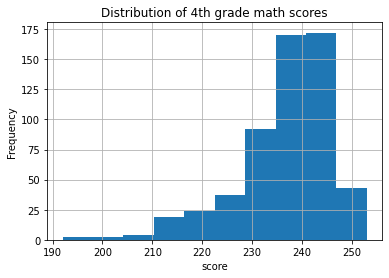

In [22]:
df.AVG_MATH_4_SCORE.hist()
plt.xlabel('score')
plt.ylabel('Frequency')
plt.title('Distribution of 4th grade math scores')

**<CAPTION FOR VIZ 1>** This histogram shows how many students were scoring in the ranges specified above. It shows that most students score between 235 and 245

Visualization 2

Text(0.5, 1.0, '4th grade math score over time')

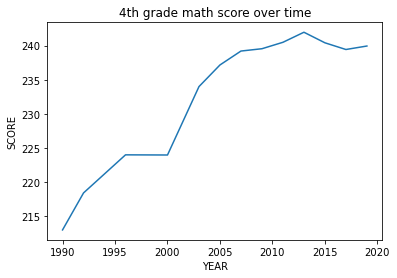

In [23]:
df.groupby('YEAR').AVG_MATH_4_SCORE.mean().plot()
plt.ylabel('SCORE')
plt.title('4th grade math score over time')

**<CAPTION FOR VIZ 2>** This graph shows how math scores have changed over the last 30 years, and they seem to get higher as we approach the present.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df[['STATE_REVENUE','ENROLL_4','CAPITAL_OUTLAY_EXPENDITURE','YEAR']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']
# NAEP grade 4 math cutoff: basic, 214 ; proficient 249
y = df.loc[X.index]['AVG_MATH_4_SCORE']>230

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=0)

<h2> Prediction </h2>

    Chosen ML task: **<REGRESSION/CLASSIFICATION>** I chose CLASSIFICATION

In [27]:
# import your sklearn class here
from sklearn.neighbors import KNeighborsClassifier

In [28]:
# create your model here
model = KNeighborsClassifier(n_neighbors=3)

In [29]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
y_pred = model.predict(X_test)

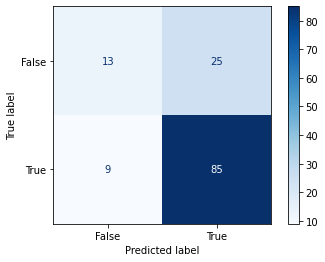

In [31]:
# for classification:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

In [32]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
accuracy_score(y_test, model.predict(X_test))

0.7424242424242424

In [33]:
recall_score(y_test, model.predict(X_test))

0.9042553191489362

In [34]:
precision_score(y_test, model.predict(X_test))

0.7727272727272727

In [35]:
# for regression: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = ??
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel(??)

SyntaxError: invalid syntax (<ipython-input-35-9dec6f34b110>, line 7)

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK AND FINDINGS\>**
The findings that I discovered were that my entire prediction was about 74% accurate, which isn't too bad but it could be improved. I predicted true for a lot of students that were actually false but the other way around was fine. Using this and the recall score I calculated, it is true that it was much easier to identify students who were going to pass as passing in my model than identify students who were going to fail. Because there were only 38 pieces of data where the expected was false, but I only identified that 13 of them were going to fail, which is pretty bad, as it was less than half(did even worse than guessing). It was also seen that when I predicted true for a piece of data it was likely to be true, but when I picked false, it was also likely to be true. This tells me I did a pretty good job of figuring out which students would pass, but did a poor job in finding out which students would fail. 